# Import needed Libraries

In [159]:
import numpy as np  #for numerical computations
import pandas as pd #for data processing and analysis
from matplotlib import pyplot as plt #for data visualization
from sklearn.cluster import KMeans  #import KMeans clustering algorithm
from sklearn.preprocessing import StandardScaler #for scaling features
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster #import hierarchical clustering functions

# Read Data

In [160]:
data=pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')  

In [161]:
data  # Display data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [162]:
data.shape  # Display shape of data (number of rows and columns)

(541909, 8)

In [163]:
data.describe()  # Display int columns and their counts, mean, standard deviation, minimum, maximum,and three quantiles

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [164]:
data.dtypes # Display types of data

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [165]:
data.info()  # Display each variable with the number of not null values and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Preprocessing data

In [166]:
data.drop_duplicates(inplace=True)  # Drop duplicated rows

In [167]:
data.isnull().sum()  # Count number of nulls in each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [168]:
# Fill the null in describtion with dash as if i droped it, many information will be lost
data['Description'].fillna(value='/',inplace=True)

In [169]:
data.dropna(inplace=True) # Drop the rest of null values as it's not important

In [170]:
data.isnull().sum()   # Display number of nulls after handeling it

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [171]:
data.describe()  # Show description of data after handeling nulls

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [172]:
# Drop the quantity that less than or equal to 0 as it's irrelevant for the analysis 
data.drop(data[data['Quantity'] <= 0].index, inplace = True)  

In [173]:
# Found from data that each stock code may have a unit price or not 
# So i replaced the '0' unit price with maximum unit price for the same stock code
stockGroup = data.groupby('StockCode')
data['UnitPrice'] = stockGroup['UnitPrice'].apply(lambda x: x.replace(0, x.max()))

In [174]:
data.describe()  # Describe data 

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.189658,15287.734822
std,181.588420,27.545852,1713.567773
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### After searching for the domain, i found that there is marketing matrix called RFM, calculates the [recency: recent time a customer made a purchase, Frequency: Number of purchases a customer made, and Monetry: Total amount of money a customer paid ] so i'll make a dataframe to get these analysis and take it for the modeling step

In [175]:
# Make a new column called ('Monetry')
data['Monetry'] = data['Quantity']*data['UnitPrice']

# Display customer id with sum of Monetry
Monetry = data.groupby('CustomerID')['Monetry'].sum()

# To remove index column
Monetry = Monetry.reset_index()
Monetry

,CustomerID,Monetry
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


In [176]:
# Calculate the total purchases for each customer 
Frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# To remove index column
Frequency = Frequency.reset_index()

# dataframe with columns(customer id and the Frequency)
Frequency.columns = ['CustomerID', 'Frequency']
Frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18280.0,1
4335,18281.0,1
4336,18282.0,2
4337,18283.0,16


In [177]:
# Combine the Monetry column and Frequency column in one data frame with the customerID
F_M_matrix = pd.merge(Monetry,Frequency,on='CustomerID')
F_M_matrix

,CustomerID,Monetry,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1
...,...,...,...
4334,18280.0,180.60,1
4335,18281.0,80.82,1
4336,18282.0,178.05,2
4337,18283.0,2045.53,16


In [178]:
# convert the InvoiceDate column to date time format days-month-year 24 hours format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')
maxDate = max(data['InvoiceDate'])
maxDate 

Timestamp('2011-12-09 12:50:00')

In [179]:
# Create new column to get the difference between the last date found and each date 
data['Recency'] = maxDate - data['InvoiceDate']

# Select the days
data['Recency'] = data['Recency'].dt.days 
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetry,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [180]:
# Group customerID with the Recency by their minimum number of days to get the last time the customer purchased
Recency = data.groupby('CustomerID')['Recency'].min() 

# To remove index column
Recency = Recency.reset_index() 
Recency

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4334,18280.0,277
4335,18281.0,180
4336,18282.0,7
4337,18283.0,3


In [182]:
# Combine the Recency column and frequency and monetry dataframe in one data frame with the customerID
R_F_M_Matrix = pd.merge(F_M_matrix,Recency,on='CustomerID')
R_F_M_Matrix

,CustomerID,Monetry,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
...,...,...,...,...
4334,18280.0,180.60,1,277
4335,18281.0,80.82,1,180
4336,18282.0,178.05,2,7
4337,18283.0,2045.53,16,3


In [183]:
R_F_M_Matrix.describe()  # Describe the RFM matrix

,CustomerID,Monetry,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2057.578992,4.271952,91.518322
std,1721.889758,9008.387450,7.705493,100.009747
min,12346.000000,3.750000,1.000000,0.000000
25%,13812.500000,306.720000,1.000000,17.000000
50%,15299.000000,671.690000,2.000000,50.000000
75%,16778.500000,1661.860000,5.000000,141.000000
max,18287.000000,281327.780000,210.000000,373.000000


# Normalize Data

In [184]:
# Put the Total_Price_Putrchase dataframe in another variable and drop the customer id
x = R_F_M_Matrix.drop('CustomerID',axis=1) 

# Normalize data 
normalizedData =StandardScaler().fit_transform(x) 
normalizedData

array([[ 8.34052487e+00, -4.24674873e-01,  2.33485829e+00],
       [ 2.50064800e-01,  3.54080191e-01, -9.05199314e-01],
       [-2.89029527e-02, -3.52973410e-02, -1.75186336e-01],
       ...,
       [-2.08666160e-01, -2.94882363e-01, -8.45198247e-01],
       [-1.33768451e-03,  1.52221279e+00, -8.85198958e-01],
       [-2.44576938e-02, -1.65089852e-01, -4.95192025e-01]])

# Kmeans clustering, heriarachial Clustering, and Visualize

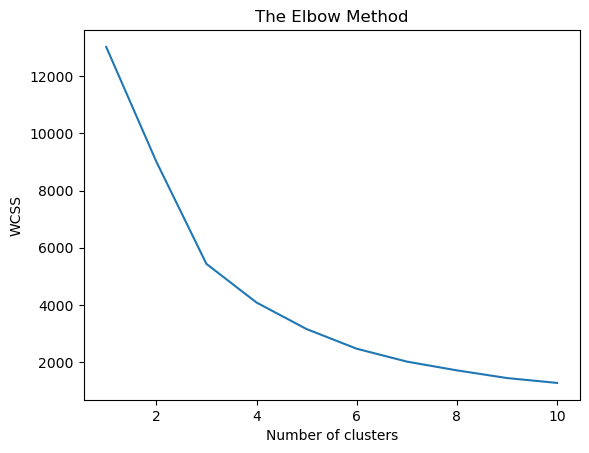

In [185]:
# Draw the elbow graph
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  # Make a loop from 1 to 10 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(normalizedData)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [186]:
# Found that 3 clusters is the best in the above graph
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# predict on normalized data
y_kmeans = kmeans.fit_predict(normalizedData)

In [187]:
# Assign each row with its cluster starting from 1
R_F_M_Matrix['cluster_labels'] = y_kmeans+1

# Display data
R_F_M_Matrix

,CustomerID,Monetry,Frequency,Recency,cluster_labels
0,12346.0,77183.60,1,325,3
1,12347.0,4310.00,7,1,1
2,12348.0,1797.24,4,74,1
3,12349.0,1757.55,1,18,1
4,12350.0,334.40,1,309,3
...,...,...,...,...,...
4334,18280.0,180.60,1,277,3
4335,18281.0,80.82,1,180,3
4336,18282.0,178.05,2,7,1
4337,18283.0,2045.53,16,3,1


In [188]:
# Display mean of each cluster with dropping column (customerID) as it's irrelevant to get its mean value
R_F_M_Matrix.drop('CustomerID',axis=1).groupby('cluster_labels').mean()

,Monetry,Frequency,Recency
cluster_labels,,,
1,1859.045294,4.671928,40.445682
2,86148.041923,66.500000,5.038462
3,629.769696,1.582255,246.106285


In [189]:
# Drop column (cluster_labels)
R_F_M_Matrix.drop('cluster_labels',axis=1,inplace=True)
R_F_M_Matrix

,CustomerID,Monetry,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
...,...,...,...,...
4334,18280.0,180.60,1,277
4335,18281.0,80.82,1,180
4336,18282.0,178.05,2,7
4337,18283.0,2045.53,16,3


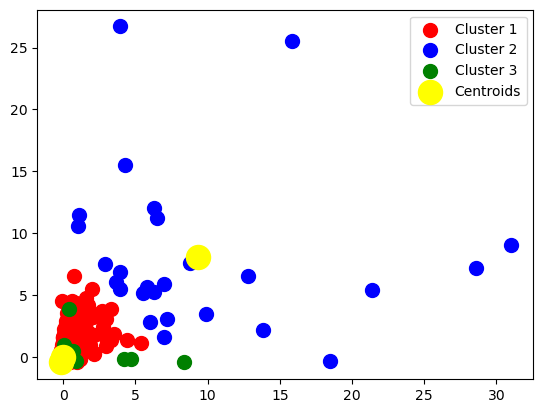

In [190]:
# Visualizing the clusters
plt.scatter(normalizedData[y_kmeans == 0, 0], normalizedData[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(normalizedData[y_kmeans == 1, 0], normalizedData[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(normalizedData[y_kmeans == 2, 0], normalizedData[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow'
            , label = 'Centroids')
plt.legend()
plt.show()

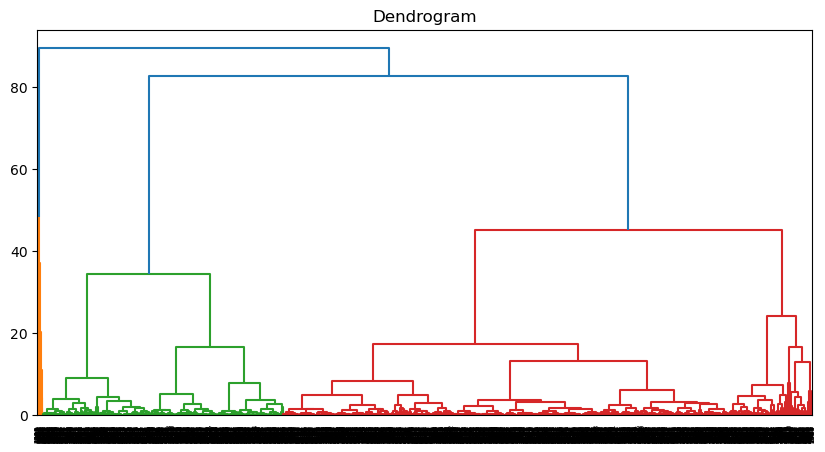

In [191]:
# Perform hierarchical clustering
linkage_type = 'ward'  
linkage_matrix = linkage(normalizedData, method=linkage_type)
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()

In [192]:
# Assign data points to 3 clusters based on dendrogram
num_clusters = 3 
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

In [193]:
# Assign each row with its cluster
R_F_M_Matrix["Cluster"] = clusters  
R_F_M_Matrix

,CustomerID,Monetry,Frequency,Recency,Cluster
0,12346.0,77183.60,1,325,3
1,12347.0,4310.00,7,1,3
2,12348.0,1797.24,4,74,3
3,12349.0,1757.55,1,18,3
4,12350.0,334.40,1,309,2
...,...,...,...,...,...
4334,18280.0,180.60,1,277,2
4335,18281.0,80.82,1,180,2
4336,18282.0,178.05,2,7,3
4337,18283.0,2045.53,16,3,3


In [194]:
# Display description of each cluster with dropping column (customerID) as it's irrelevant to get analysis about it

R_F_M_Matrix.drop('CustomerID',axis=1).groupby("Cluster").describe()

Monetry                                                               \
          count          mean           std       min         25%        50%   
Cluster                                                                        
1          26.0  86148.041923  70920.359150  11189.91  38040.6475  59697.415   
2        1350.0    555.377579    702.300647      3.75    181.3125    334.735   
3        2963.0   2004.126367   3615.518737      6.20    415.8200    962.390   

                               Frequency             ...              Recency  \
                75%        max     count       mean  ...   75%    max   count   
Cluster                                              ...                        
1        110673.155  281327.78      26.0  66.500000  ...  83.0  210.0    26.0   
2           634.845    9864.26    1350.0   1.752593  ...   2.0   12.0  1350.0   
3          2219.815   77183.60    2963.0   4.873777  ...   6.0   55.0  2963.0   

                                                                   
               mean        std   min    25%    50%     75%    max  
Cluster                                                            
1          5.038462   8.599911   0.0    0.0    2.5    5.25   38.0  
2        220.542963  78.557345  86.0  154.0  213.0  280.00  373.0  
3         33.491056  28.561604   0.0   10.0   25.0   52.00  371.0  

[3 rows x 24 columns]